# Chapter 2 : End-To-End Machine Learning Project 

### Our approach for this problem will be based below main steps-

1. Look at the bigger picture
2. Get the data
3. Explore & visualise the data to gain insights
4. Prepare the data for machine learning algorithms
5. Select a model & train it
6. Fine-tune your model
7. Present your solution
8. Launch, monitor & maintain your system

In [24]:
# import statements
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
from pandas.plotting import scatter_matrix

## 2. Get the Data

In [2]:
data_path = os.path.join(os.getcwd(), "housing.csv")

In [3]:
data_path

'/Users/n1579399/Desktop/my-datascience-learnings/books/hands-on-ml-3/chapter2/housing/housing.csv'

In [4]:
housing_df = pd.read_csv(data_path)
housing_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Notice feature 'total_bedrooms' has only 20433 out of total dataset entries 20640. Meaning 207 districts does not have valid value for this feature.

### Exploring 'ocean_proximity' as categorical feature: 5 categorical values as below

In [6]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Exploring the distribution of numerical attributes
- Numerical features are pretty skewed, we need may need to normalise them
- Few features like housing_median_age & median_house_value are capped at different levels

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

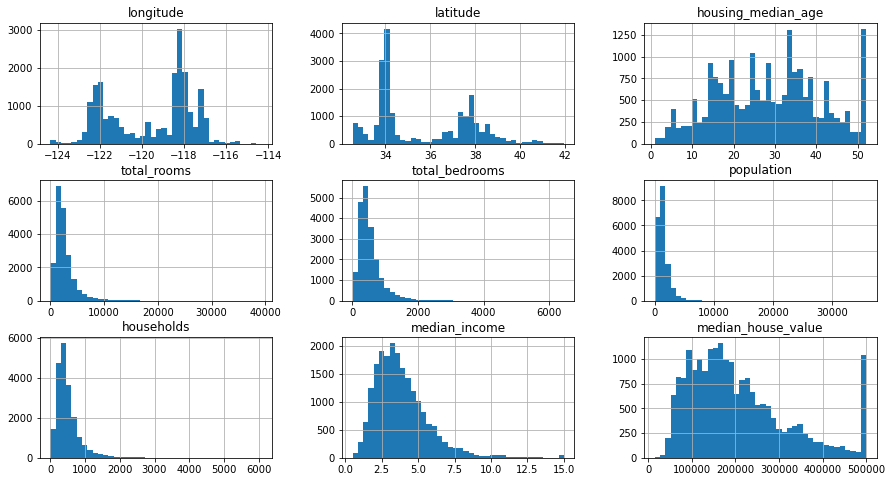

In [7]:
housing_df.hist(figsize=(15,8), bins=40) 
# figsize = how stretch the figure will be
# bins = how smooth the distribution looks like, divide data into smaller bins

### Creating a Test Set

- Here we have randomly selected the test set which is not the ideal way because it might introduce the sampling bias. Test set should be the representative of all the dataset to produce reliable & accurate results.
- Assuming 'median_income' feature is very important in predicting 'median_house_value' so the test set should be representative of this feature.
- Looking at 'median_income', it appears to be divided mostly from 1.5 to 6. Let's create new feature 'income_cat'to represent categories for this continous variable. Categories shouldn't be too large or small
- pd.cut() function provides the way to create these categories
- train_test_split() function provides an argument stratify=feature_name which is used to create test set with stratified strategy

In [8]:
housing_df["income_cat"] = pd.cut(housing_df["median_income"],
                                 bins=[0.,1.5,3.,4.5,6., np.inf],
                                 labels=[1,2,3,4,5]) # np.inf required as bins should > labels

Text(0, 0.5, 'Number of districts')

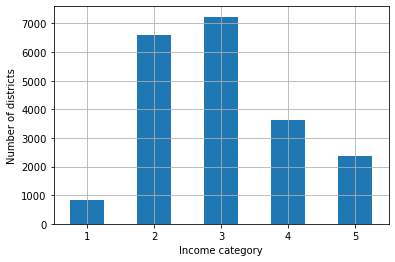

In [9]:
housing_df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True) # rot: 
plt.xlabel("Income category")
plt.ylabel("Number of districts")

In [10]:
# unstratified data
unstrat_train_set, unstrat_test_set = train_test_split(housing_df, test_size=0.2, random_state=42)

In [11]:
# stratified sampling
strat_train_set, strat_test_set = train_test_split(housing_df, test_size=0.2, random_state=42, stratify=housing_df["income_cat"])

In [12]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set) # total strat test set = 4128


3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [13]:
# we won't use the income_cat feature again & also don't want it to influence our predictions, so we will remove it
for feat_set in (strat_train_set, strat_test_set):
    feat_set.drop("income_cat", axis=1, inplace=True)

## 3. Explore & Visualise the Data to Gain Insights

In [14]:
# Lets' copy the original data to analyse/manipulate

housing = strat_train_set.copy()
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

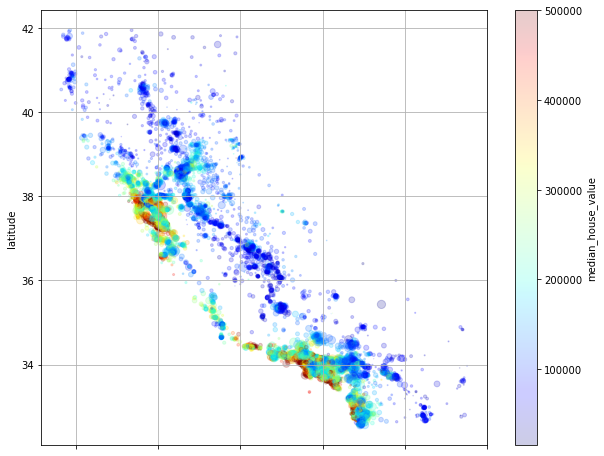

In [15]:
# As we are dealing with geographical data so it make sense to plot the scatterplot

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
            grid=True, s=housing["population"]/100, 
             cmap="jet", c="median_house_value",
            figsize=(10,8)) # alpha represents high density areas

### Correlations of attributes

In [16]:
corr_matrix = housing.corr() # corr method uses Pearson' coefficient

In [17]:
corr_matrix["median_house_value"].sort_values()

latitude             -0.139584
longitude            -0.050859
population           -0.020153
total_bedrooms        0.054635
households            0.071426
housing_median_age    0.102175
total_rooms           0.137455
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

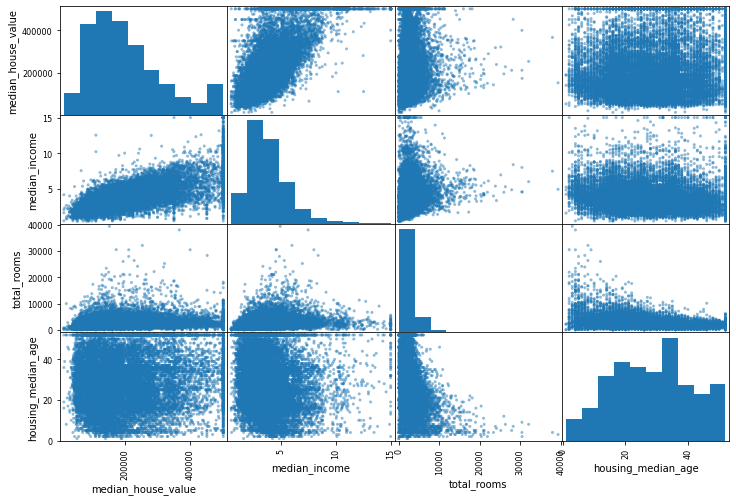

In [18]:
# Another way to look the correlations between numerical attributes is scatter plots
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()
# only promising attribute to predict median_house_value would be median_income

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

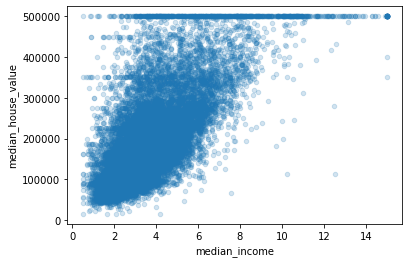

In [19]:
# lets zoom in with median_income
housing.plot(kind="scatter",x="median_income", y="median_house_value",alpha=0.2)

In [23]:
# removing the predictors from data
housing = strat_train_set.drop("median_house_value", axis=1) # axis = 1 means transform via columns

### Clean the Data
- Most ML algorithms won't work on missing data so we need to handle this data
- Its good idea to use imputer from sklearn
    - You can apply the transformation on all the data simultanously like train, test, validation
    - It stores the missing value strategy (for example, median) for all the features and for incoming data
    - Imputer saves the result into its 'statistics_' attribute

In [26]:
# Median can only work with numeric data features
imputer = SimpleImputer(strategy="median")

In [29]:
# dataframe with numeric only features
housing_num = housing.select_dtypes(include=[np.number])

In [30]:
housing_num.info() # total_bedrooms have null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [31]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [32]:
# imputer saves the result in its 'statistics_' instance. Showing median for all 8 numeric features
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [34]:
# now using this trained imputer to transform the values in training set
housing_imputed = imputer.transform(housing_num)

In [36]:
print(housing_imputed, type(housing_imputed))

[[-1.2242e+02  3.7800e+01  5.2000e+01 ...  1.5760e+03  1.0340e+03
   2.0987e+00]
 [-1.1838e+02  3.4140e+01  4.0000e+01 ...  6.6600e+02  3.5700e+02
   6.0876e+00]
 [-1.2198e+02  3.8360e+01  3.3000e+01 ...  5.6200e+02  2.0300e+02
   2.4330e+00]
 ...
 [-1.1706e+02  3.2590e+01  1.3000e+01 ...  2.8140e+03  7.6000e+02
   4.0616e+00]
 [-1.1840e+02  3.4060e+01  3.7000e+01 ...  1.7250e+03  8.3800e+02
   4.1455e+00]
 [-1.2241e+02  3.7660e+01  4.4000e+01 ...  6.8200e+02  2.1200e+02
   3.2833e+00]] <class 'numpy.ndarray'>
